In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd

df = pd.read_excel('/1730285881-Airbnb_Open_Data.xlsx')


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


Problems Identified within the Data

541 duplicated Records where found in the Data

Insufficient information were recorded for the house rules and Licence columns.

Dollar signs and commas recorded along with the values for price and service fee.

The currency for price and service fee were not added to the column's titles.

Missing values in some records

Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes

In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

Some outliers were identified in the availability 365 column.

**Steps to be Taken for Data Cleaning**

Drop duplicated records.

Drop house_rules and license columns with insufficient data.

Remove all dollar signs in the price and service fee columns.

Remove all commas from the price and service fee columns.

Rename the price and service fee columns to include a dollar signs.

Drop all records with missing values.

Change all mismatched data types to the appropriate once.

Correct the Spelling of 'brookin' to 'Brooklyn'

Get rid of outliers in the 'availability 365' column data.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [ ]:
df['price']=df['price'].astype(str).str.replace('$','',regex=False)
df['service fee']=df['service fee'].astype(str).str.replace('$','',regex=False)

df['price'  ]=df['price'].astype(str).str.replace(',','',regex=False)
df['service fee']=df['service fee'].astype(str).str.replace(',','',regex=False)

In [ ]:
df.rename(columns={'price':'price($)','service fee':'service fee($)'},inplace=True)

In [ ]:
# Load the data
df = pd.read_excel('/1730285881-Airbnb_Open_Data.xlsx')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop columns with insufficient data
df.drop(['house_rules','license'],axis=1,inplace=True)

# Remove dollar signs and commas from price and service fee, then convert to float
df['price']=df['price'].astype(str).str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)
df['service fee']=df['service fee'].astype(str).str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)

# Rename price and service fee columns
df.rename(columns={'price':'price($)','service fee':'service fee($)'},inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert id and host id to string
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)

# Convert last review to datetime
df['last review']=pd.to_datetime(df['last review'])

# Correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

# Drop outliers in 'availability 365' column
df=df.drop(df[df['availability 365']>500].index)

# Display the first few rows of the cleaned dataframe
display(df.head())

# Display info of the cleaned dataframe
display(df.info())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price($),service fee($),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

None

In [ ]:
df.duplicated().value_counts()

,count
False,83389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

# EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

Summary Statistcs

In [ ]:
df.describe()


,lat,long,instant_bookable,Construction year,price($),service fee($),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


What are the different data types in the dataset

In [ ]:
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


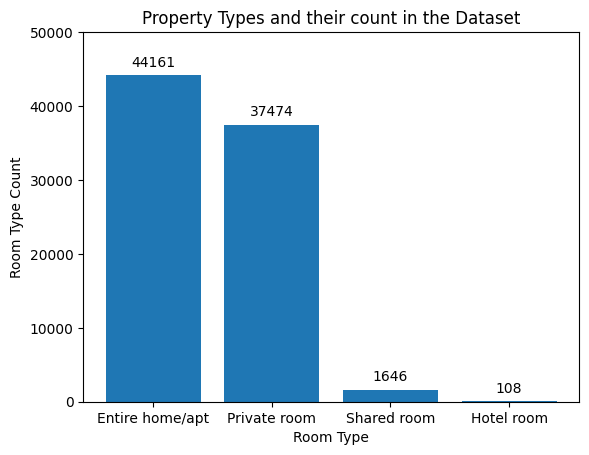

In [ ]:
room_type_bar = plt.bar(property_type.index , property_type.loc[:, "count"]);

plt.bar_label(room_type_bar, labels = property_type.loc[:, "count"], padding = 4);

plt.ylim([0,50000]);

plt.xlabel('Room Type');

plt.ylabel('Room Type Count');

plt.title('Property Types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprise;

Entire home/apt

Private room

Shared room

Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.




Which neighborhood group has the highest number of listings?

In [ ]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


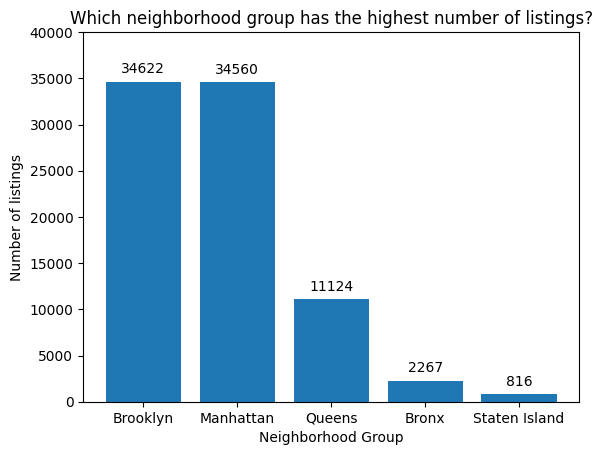

In [ ]:
hood_group_bar = plt.bar(hood_group.index , hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of listings');
plt.title('Which neighborhood group has the highest number of listings?');

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, Brooklyn has the highest number of listings with.34636, followed closely by Manhattan with 34566

Is there a relationship between the construction year of property and price?

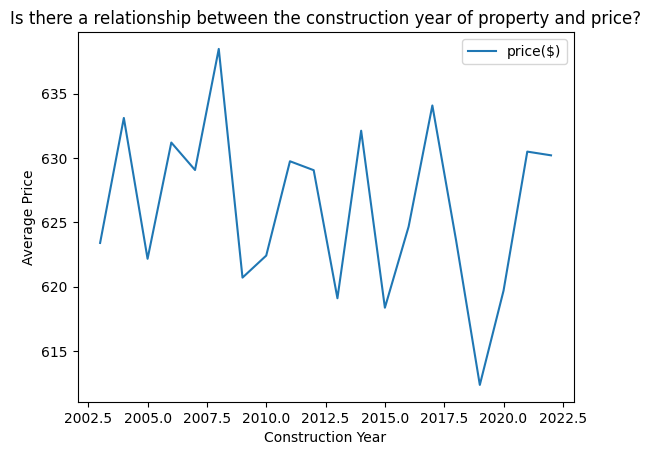

In [ ]:
import matplotlib.pyplot as plt

# Ensure the dataframe 'df' with 'price($)' column is loaded and cleaned by executing cell '8jcQn8cY5aa' first.

df.groupby(df['Construction year'])['price($)'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price');
plt.title('Is there a relationship between the construction year of property and price?');

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progresses

**Who are Top 10 Hosts by calculated Hosting List**

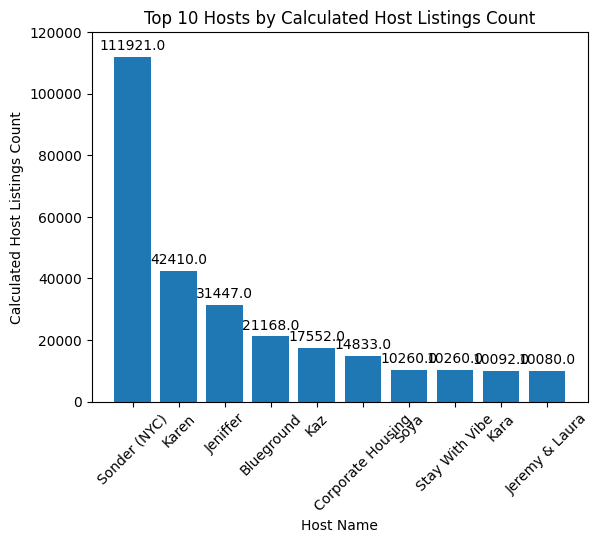

In [ ]:
import matplotlib.pyplot as plt

# Group by host name, sum their listings, get top 10
hosts = (
    df.groupby('host name')['calculated host listings count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Create bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])

# Add labels on bars
plt.bar_label(hosts_bar,
              labels=hosts['calculated host listings count'],
              label_type='edge',
              padding=3)

# Axis labels and formatting
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=45)
plt.ylim([0, 120000])
plt.title("Top 10 Hosts by Calculated Host Listings Count")

plt.show()


The bar chart above llustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings

Subunguently the other hosts follow in descending order

Karen at second postion with 42410 hosts

Jeniffer at the poortion with 31447 hosts

Blueground at fourth position with 21168 hosts

Kaze fifth position with 17552 hosts

Corporate Housing af sixth position with 14833 hosts

Suys at seventh position with 10260 hosts

Stay with ribe st eight position with 10260 hosts

Kara at ninth position with 10092 hosts

and finally Jeremy and Laura at tenth position 10080 hosts

**Are hosts with verified identities more likely to receive positive reviews?**

In [ ]:
# Group by whether host identity is verified, then take mean of review scores
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

review


,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


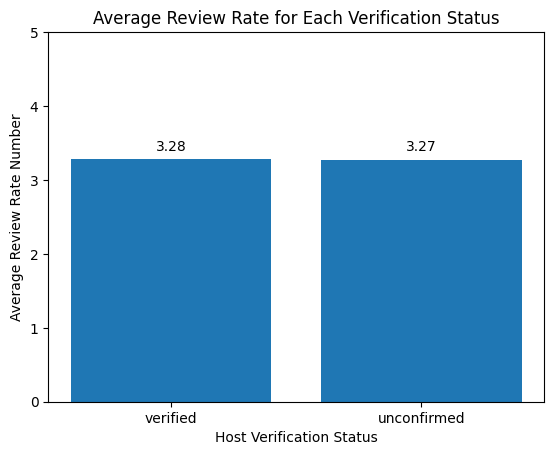

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of average review rate by host verification status
review_bar = plt.bar(review.index, review["review rate number"])

# Add labels on top of bars
plt.bar_label(review_bar, labels=round(review["review rate number"], 2), padding=4)

# Chart formatting
plt.ylim([0, 5])  # Airbnb review ratings are usually 0–5
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for Each Verification Status')

plt.show()


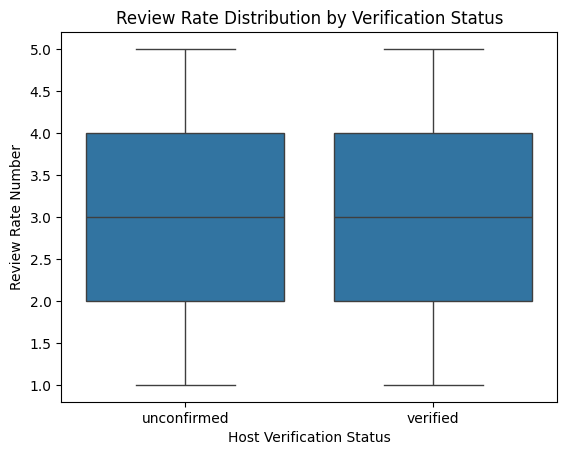

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick a base color
base_color = sns.color_palette()[0]

# Boxplot of review rate number by host verification status
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

# Labels and title
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Distribution by Verification Status')

plt.show()


The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts

Is there any correlation between the price of a listing and ist service fee?

In [ ]:
df['price($)'].corr(df['service fee($)'])

np.float64(0.9999909082976466)

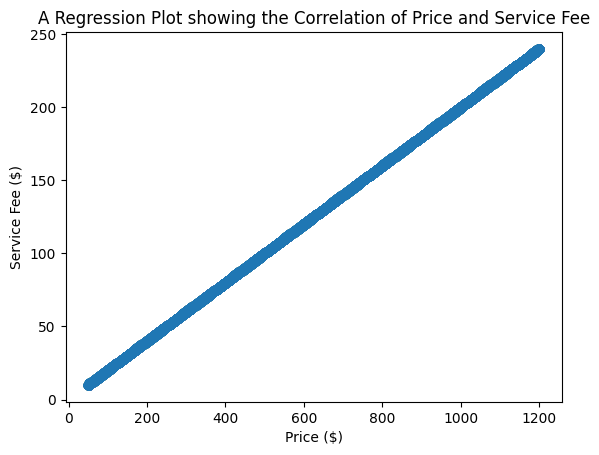

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='price($)', y='service fee($)')

plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the Correlation of Price and Service Fee')
plt.show()

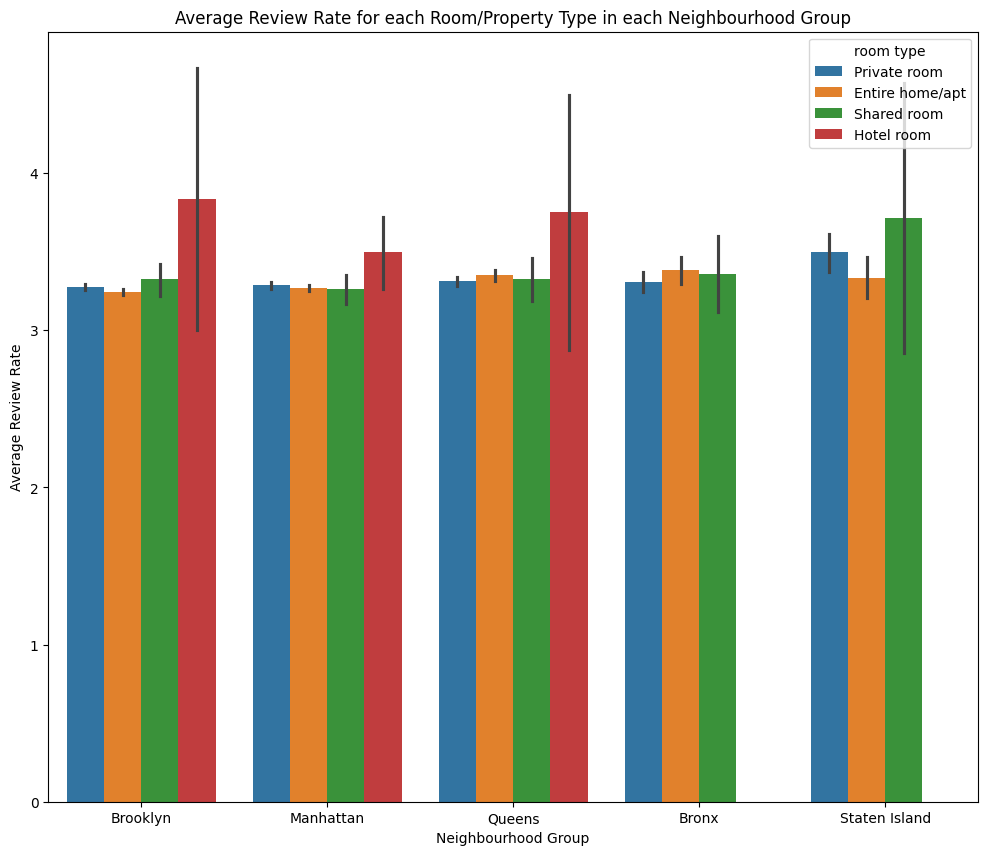

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')

plt.show()


Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located Brooklyn, Manhattan, and Queens

**Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**

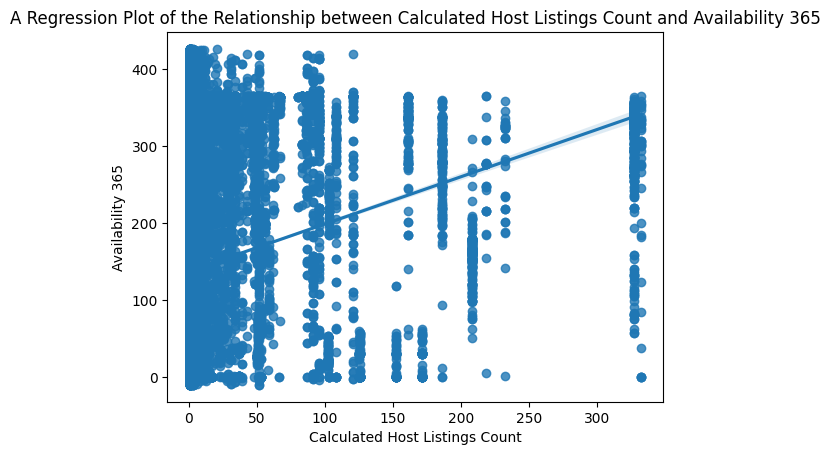

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=df, x='calculated host listings count', y='availability 365')

plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

plt.show()

In [ ]:
corr = df['calculated host listings count'].corr(df['availability 365'])
print("Correlation:", corr)

Correlation: 0.1359971471570339


The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating correlation between the two variables.

**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.